In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')

In [3]:
sns.set_palette("Spectral")

# Set a base style
sns.set_style("whitegrid")

# Customize specific style parameters
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "#cccccc",
    "axes.facecolor": "#f0f0f0",
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
}
sns.set_context("notebook", rc=custom_params)

In [4]:
df = pd.read_csv('Datasets/wine_data.csv', header=None, usecols=[0,1,2])

In [5]:
df.columns = ['Class label', 'Alcohol', 'Malic acid']

In [6]:
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [7]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                   df['Class label'],
                                                    test_size=0.3,
                                                   random_state=0)
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [10]:
class MyMinMaxScaler:
    def __init__(self):
        self.min_ = None
        self.max_ = None
    def fit(self, X):
        self.min_ = np.min(X, axis=0)
        self.max_ = np.max(X, axis=0)
        return self
    def transform(self, X):
        return (X - self.min_) / (self.max_ - self.min_)
    def fit_transform(self, X):
        return self.fit(X).transform(X)

In [11]:
scaler = MyMinMaxScaler()

In [13]:
scaler = MyMinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [15]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


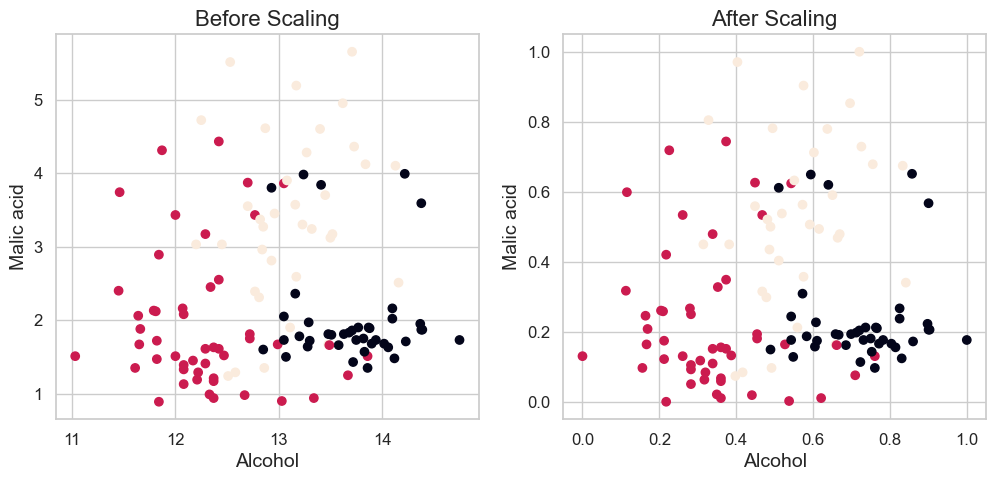

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot before scaling with a different color
ax1.scatter(X_train['Alcohol'], X_train['Malic acid'], c=y_train)
ax1.set_title('Before Scaling')
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Malic acid')

# Plot after scaling with a different color
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'], c=y_train)
ax2.set_title('After Scaling')
ax2.set_xlabel('Alcohol')
ax2.set_ylabel('Malic acid')

plt.show()